# Project Description 
The aim of the project is to analyse the data on car accidents in the US and to see the various factors which are associated with the accidents and their severity. 

The dataset used here is a [US Accident Dataset](https://www.kaggle.com/sobhanmoosavi/us-accidents) from Kaggle. The data collected is from February 2016 to December 2020. 

In this notebook we build a model to predict the severity of the accidents using the various features.

## Imports

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# model_selection for train test split and parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Decision Trees and Random Forests
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from time import time
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

## The Data

In [2]:
df = pd.read_csv('USAccidents/US_Accidents_Dec20_updated.csv')

In [3]:
# set the option to display maximum columns to 50 in order to see data in all columns
pd.set_option('display.max_columns', 50)

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

## EDA

In [6]:
# checking the number of unique values in all the columns
df.nunique()

ID                       1516064
Severity                       4
Start_Time               1037092
End_Time                 1161415
Start_Lat                 590611
Start_Lng                 603369
End_Lat                   587824
End_Lng                   599916
Distance(mi)               11514
Description               527655
Number                     37592
Street                     93048
Side                           2
City                       10657
County                      1671
State                         49
Zipcode                   177196
Country                        1
Timezone                       4
Airport_Code                1985
Weather_Timestamp         331748
Temperature(F)               775
Wind_Chill(F)                883
Humidity(%)                  100
Pressure(in)                1007
Visibility(mi)                74
Wind_Direction                24
Wind_Speed(mph)              121
Precipitation(in)            187
Weather_Condition            116
Amenity   

In [7]:
# check the accident count by Side
df['Side'].value_counts()

R    1294562
L     221502
Name: Side, dtype: int64

**Turning_Loop has all False, so this column can be dropped later**

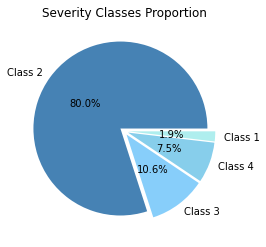

In [8]:
# pie chart for severity
severity = df['Severity'].value_counts()
pie, ax = plt.subplots(figsize=[4,4])
labels = ['Class 2','Class 3', 'Class 4', 'Class 1']
colors = ['SteelBlue', 'LightSkyBlue', 'SkyBlue', 'PaleTurquoise']
plt.pie(x = severity, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5, colors = colors)
plt.title("Severity Classes Proportion", fontsize=12)
plt.show()

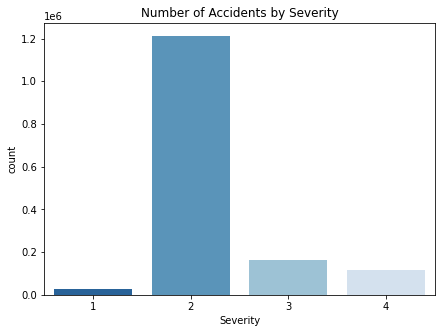

In [9]:
# countplot for number of accidents by severity
plt.figure(figsize=(7,5))
sns.countplot(data = df,
              x = 'Severity',
              palette = 'Blues_r')
plt.title('Number of Accidents by Severity')
plt.show()

In [10]:
df['State'].value_counts()

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

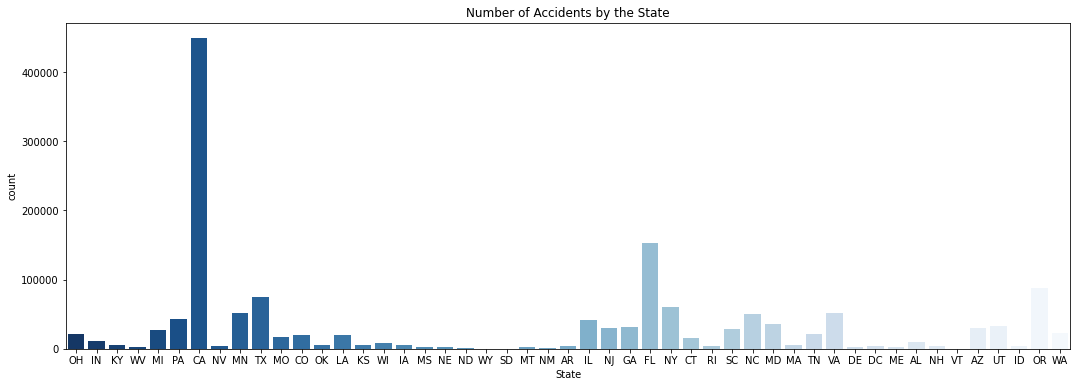

In [11]:
# countplot of the number of accidents by State
plt.figure(figsize=(18,6))
sns.countplot(data = df,
              x = 'State',
              palette = 'Blues_r')
plt.title('Number of Accidents by the State')
plt.show()

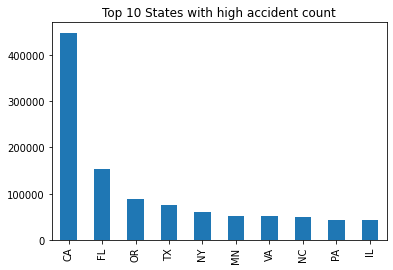

In [12]:
# barplot of top ten states with accidents
plt.figure(figsize=(6,4))
df['State'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 States with high accident count')
plt.show()

In [13]:
# Get the number of accidents by City
df['City'].value_counts()

Los Angeles                  39984
Miami                        36233
Charlotte                    22203
Houston                      20843
Dallas                       19497
                             ...  
West Charleston                  1
Paullina                         1
Ferrisburgh                      1
Robinsonville                    1
District 18 Seat Pleasant        1
Name: City, Length: 10657, dtype: int64

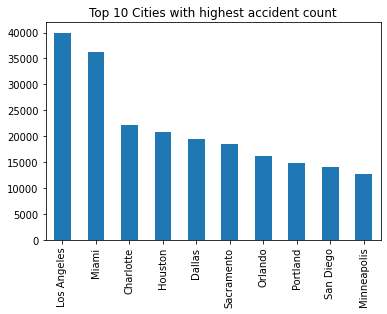

In [14]:
# Barplot of the top 10 cities with highest number of accidents
plt.figure(figsize=(6,4))
df['City'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 Cities with highest accident count')
plt.show()

In [15]:
# The count of the severity of accidents
df['Severity'].value_counts()

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

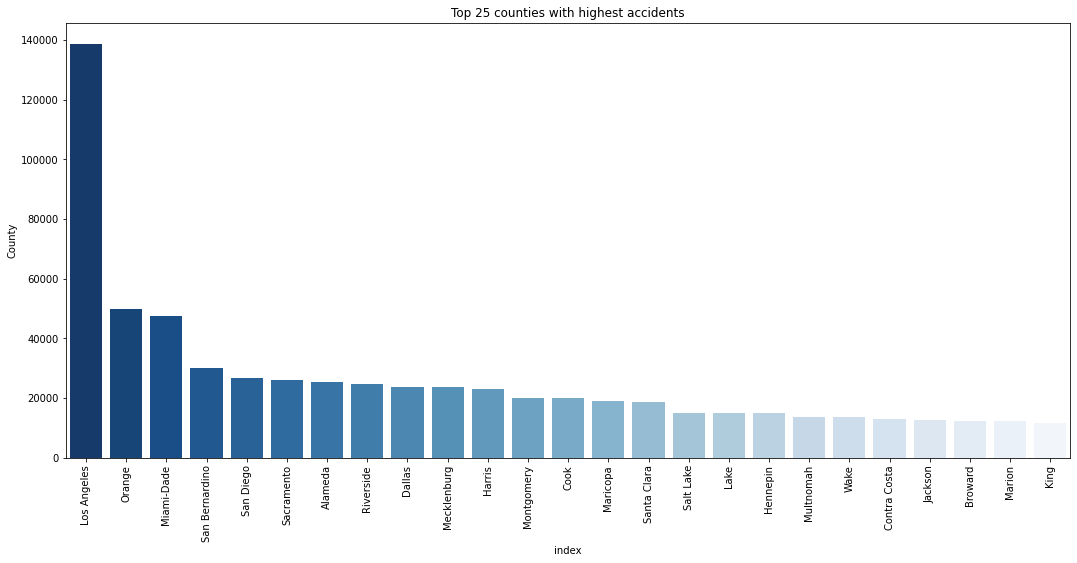

In [16]:
# Number of Accidents by county
county_df = df['County'].value_counts()[:25].reset_index()
plt.figure(figsize=(18,8))
sns.barplot(data = county_df,
            x = 'index',
            y = 'County',
            palette = 'Blues_r')
plt.xticks(rotation = 90)
plt.title('Top 25 counties with highest accidents')
plt.show()

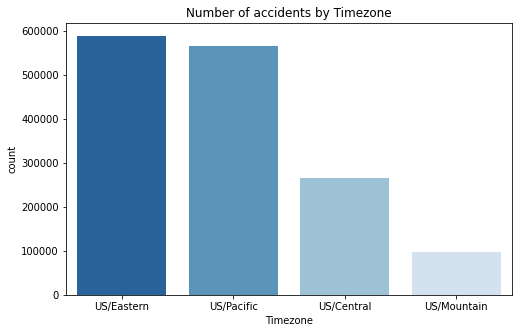

In [17]:
# Countplot of accidents by timezone
plt.figure(figsize=(8,5))
sns.countplot(data = df,
            x = 'Timezone',
            palette = 'Blues_r')
plt.title('Number of accidents by Timezone')
plt.show()

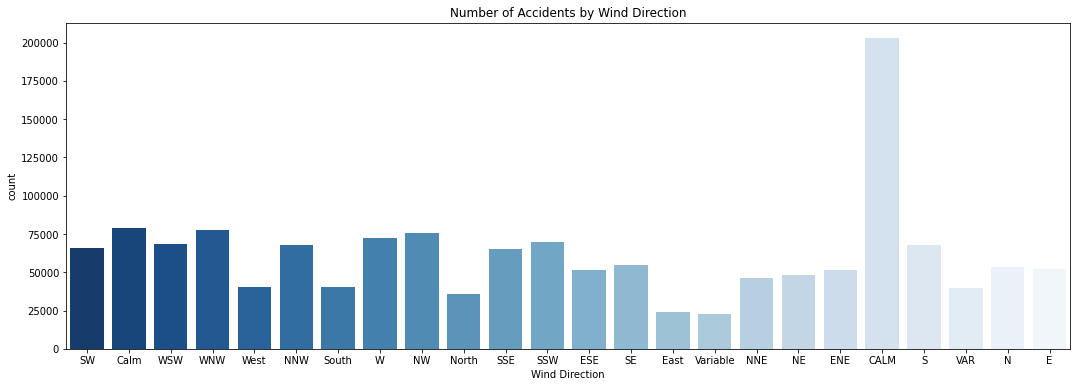

In [18]:
# Number of accidents by wind direction
plt.figure(figsize=(18,6))
sns.countplot(data = df,
              x = 'Wind_Direction',
              palette = 'Blues_r')
plt.title('Number of Accidents by Wind Direction')
plt.xlabel('Wind Direction')
plt.show()

**Need to clean the Wind_Direction feature as there is different text entered for same value for example Calm has two different entries 'Calm' and 'CALM'**

In [19]:
# replacing the values in wind direction
df['Wind_Direction'].replace({'Calm':'CALM'}, inplace=True)
df['Wind_Direction'].replace({'South':'S'}, inplace=True)
df['Wind_Direction'].replace({'West':'W'}, inplace=True)
df['Wind_Direction'].replace({'North':'N'}, inplace=True)
df['Wind_Direction'].replace({'East':'E'}, inplace=True)
df['Wind_Direction'].replace({'Variable':'VAR'}, inplace=True)
df['Wind_Direction'].replace({'WSW':'SW'}, inplace=True)
df['Wind_Direction'].replace({'WNW':'NW'}, inplace=True)
df['Wind_Direction'].replace({'NNW':'NW'}, inplace=True)
df['Wind_Direction'].replace({'SSE':'SE'}, inplace=True)
df['Wind_Direction'].replace({'SSW':'SW'}, inplace=True)
df['Wind_Direction'].replace({'ESE':'SE'}, inplace=True)
df['Wind_Direction'].replace({'NNE':'NE'}, inplace=True)
df['Wind_Direction'].replace({'ENE':'NE'}, inplace=True)

In [20]:
df['Wind_Direction'].unique()

array(['SW', 'CALM', 'NW', 'W', 'S', 'N', 'SE', nan, 'E', 'VAR', 'NE'],
      dtype=object)

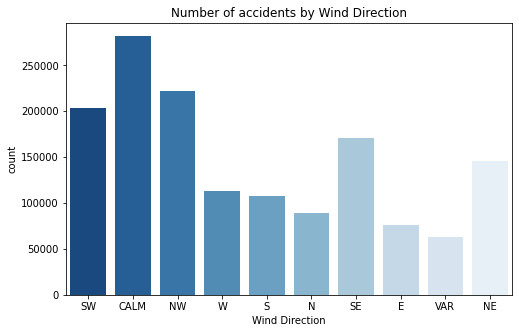

In [21]:
# replotting Number of accidents by wind direction
plt.figure(figsize=(8,5))
sns.countplot(data = df,
              x = 'Wind_Direction',
              palette = 'Blues_r')
plt.title('Number of accidents by Wind Direction')
plt.xlabel('Wind Direction')
plt.show()

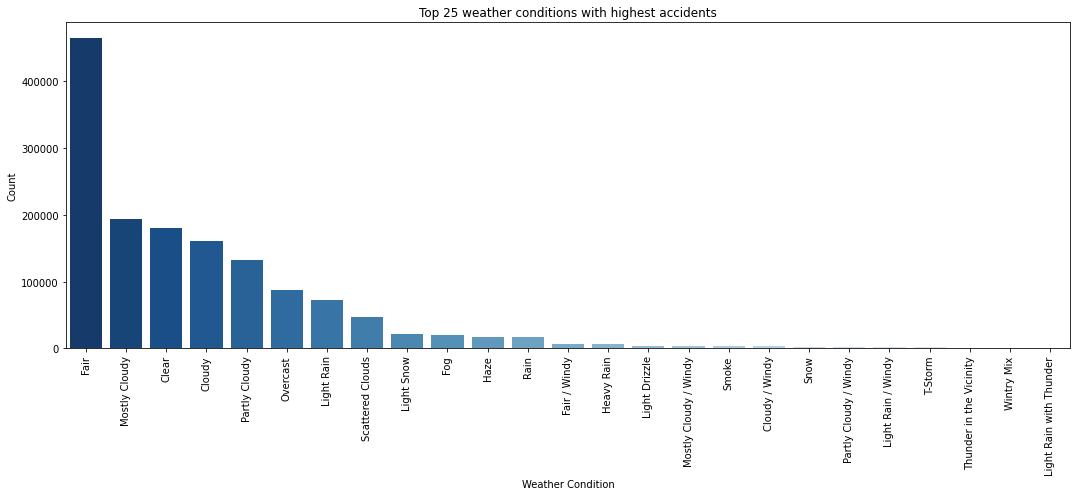

In [22]:
# Top 25 of the number of accidents by the weather condition
weather_condition_df = df['Weather_Condition'].value_counts()[:25].reset_index()
plt.figure(figsize=(18,6))
sns.barplot(data = weather_condition_df,
            x = 'index',
            y = 'Weather_Condition',
            palette = 'Blues_r')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.title('Top 25 weather conditions with highest accidents')
plt.show()

In [23]:
# Unique values of weather condition
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [24]:
# Unique values of weather condition
df['Weather_Condition'].nunique()

116

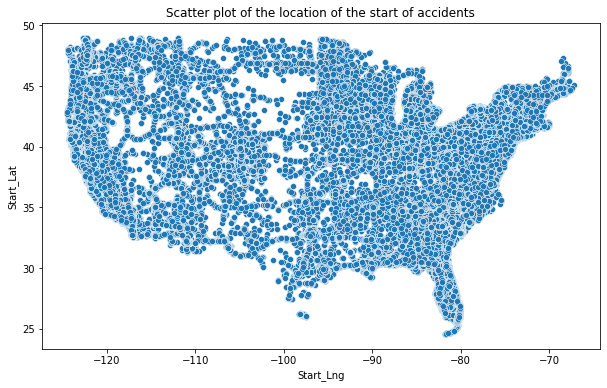

In [25]:
# scatter plot of the start latitude and start longitude
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,
                x = 'Start_Lng',
                y = 'Start_Lat')
plt.title('Scatter plot of the location of the start of accidents')
plt.show()

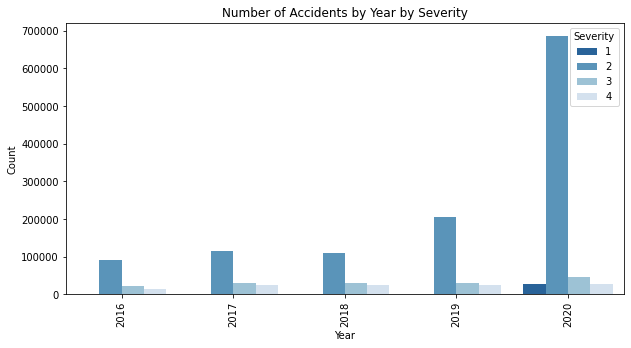

In [26]:
# Number of accidents by the year
month_counts = df.copy()
month_counts['Month'] = pd.to_datetime(df['Start_Time']).dt.month_name()
month_counts['Year'] = pd.to_datetime(df['Start_Time']).dt.year
plt.figure(figsize=(10,5))
sns.countplot(data = month_counts,
            x = 'Year',
            palette = 'Blues_r',
            hue = 'Severity')
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Accidents by Year by Severity')
plt.show()

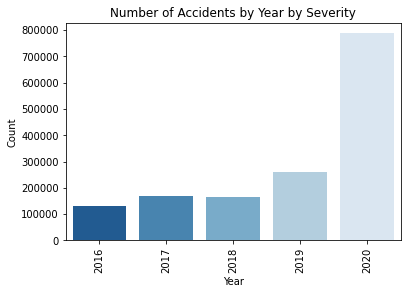

In [27]:
sns.countplot(data = month_counts,
            x = 'Year',
            palette = 'Blues_r'
            )
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Accidents by Year by Severity')
plt.show()

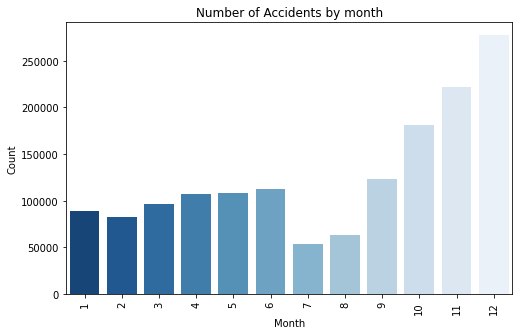

In [28]:
# Number of accidents by the month
month_counts = pd.to_datetime(df['Start_Time']).dt.month.value_counts().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data = month_counts,
            x = 'index',
            y = 'Start_Time',
            palette = 'Blues_r')
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Accidents by month')
plt.show()

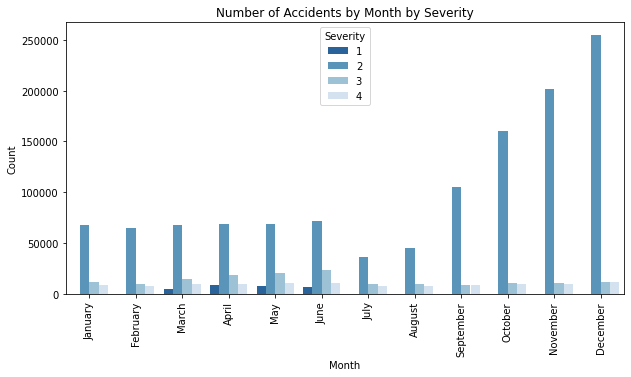

In [29]:
# Number of accidents by the month
month_counts = df.copy()
month_counts['Month'] = pd.to_datetime(df['Start_Time']).dt.month_name()
plt.figure(figsize=(10,5))
sns.countplot(data = month_counts,
            x = 'Month',
            palette = 'Blues_r',
            hue = 'Severity',
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Accidents by Month by Severity')
plt.show()

In [30]:
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

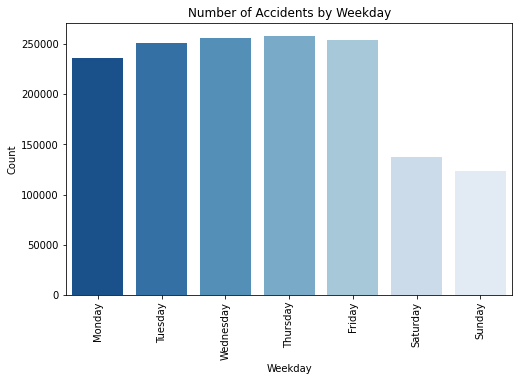

In [31]:
# Number of accidents by the weekday
weekday_counts = pd.to_datetime(df['Start_Time']).dt.day_name().value_counts().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data = weekday_counts,
            x = 'index',
            y = 'Start_Time',
            order = week_order,
            palette = 'Blues_r')
plt.xticks(rotation = 90)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Number of Accidents by Weekday')
plt.show()

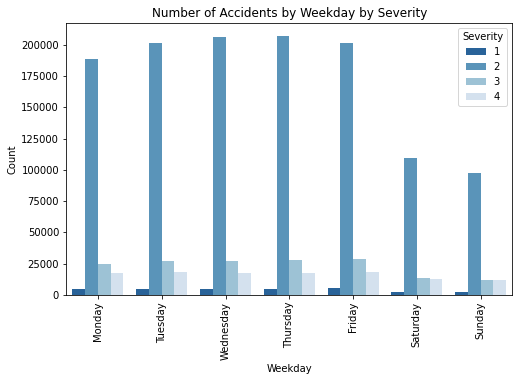

In [32]:
weekday_counts = df.copy()
weekday_counts['Weekday'] = pd.to_datetime(df['Start_Time']).dt.day_name()
plt.figure(figsize=(8,5))
sns.countplot(data = weekday_counts,
            x = 'Weekday',
            order = week_order,
            palette = 'Blues_r',
            hue = 'Severity', )
plt.xticks(rotation = 90)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Number of Accidents by Weekday by Severity')
plt.show()

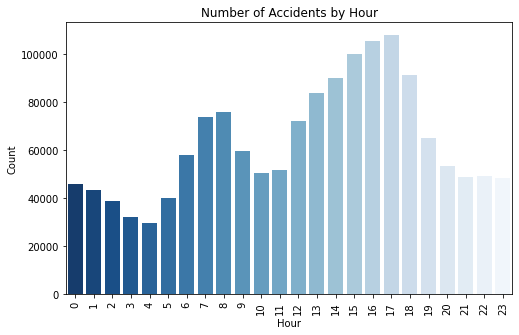

In [33]:
# Number of accidents by the hour
hour_counts = pd.to_datetime(df['Start_Time']).dt.hour.value_counts().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data = hour_counts,
            x = 'index',
            y = 'Start_Time',
            palette = 'Blues_r')
plt.xticks(rotation = 90)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Number of Accidents by Hour')
plt.show()

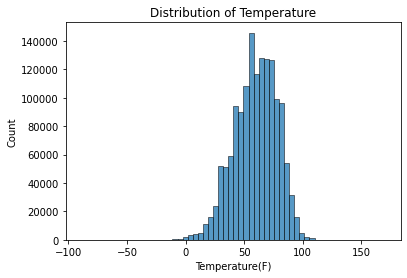

In [34]:
# histplot for distribution of temperature
plt.figure(figsize=(6,4))
sns.histplot(data = df,
             x = 'Temperature(F)',
             bins = 60)
plt.title('Distribution of Temperature')
plt.show()

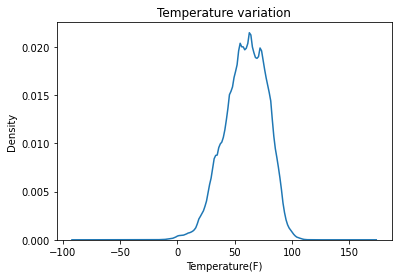

In [35]:
# kdeplot for temperature
plt.figure(figsize=(6,4))
sns.kdeplot(data = df,
            x = 'Temperature(F)')
plt.title('Temperature variation')
plt.show()

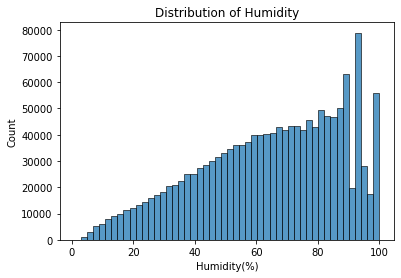

In [36]:
# plot for humidity distribution
plt.figure(figsize=(6,4))
sns.histplot(data = df,
             x = 'Humidity(%)',
             bins = 50)
plt.title('Distribution of Humidity')
plt.show()

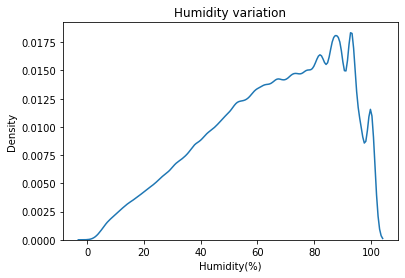

In [37]:
# kdeplot for humidity
plt.figure(figsize=(6,4))
sns.kdeplot(data = df,
            x = 'Humidity(%)')
plt.title('Humidity variation')
plt.show()

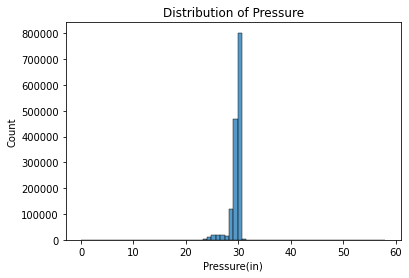

In [38]:
# plot for pressure distribution
plt.figure(figsize=(6,4))
sns.histplot(data = df,
             x = 'Pressure(in)',
             bins = 70)
plt.title('Distribution of Pressure')
plt.show()

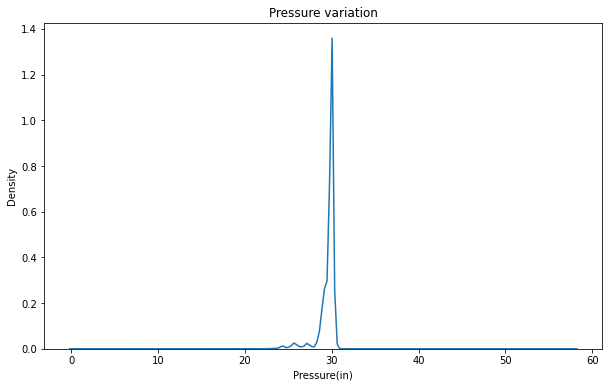

In [39]:
# kdeplot for pressure
plt.figure(figsize=(10,6))
sns.kdeplot(data = df,
            x = 'Pressure(in)')
plt.title('Pressure variation')
plt.show()

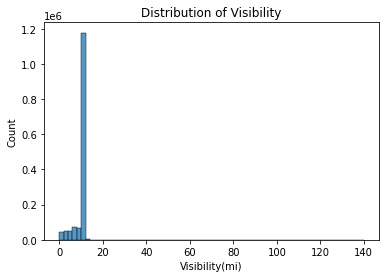

In [40]:
# plot for visibility distribution
plt.figure(figsize=(6,4))
sns.histplot(data = df,
             x = 'Visibility(mi)',
             bins = 70)
plt.title('Distribution of Visibility')
plt.show()

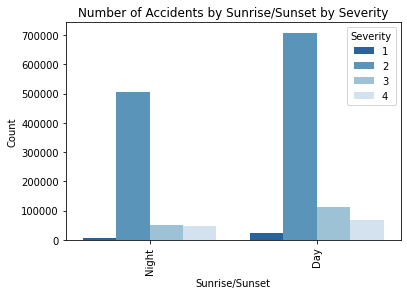

In [41]:
# plot for accident count by sunrise/sunset by severity
plt.figure(figsize=(6,4))
sns.countplot(data = df,
            x = 'Sunrise_Sunset',
            palette = 'Blues_r',
            hue = 'Severity')
plt.xticks(rotation = 90)
plt.xlabel('Sunrise/Sunset')
plt.ylabel('Count')
plt.title('Number of Accidents by Sunrise/Sunset by Severity')
plt.show()

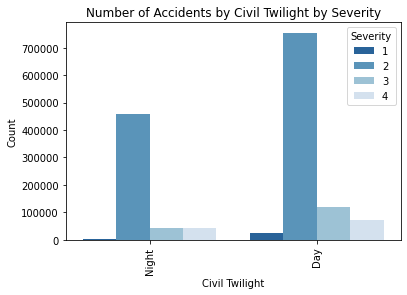

In [42]:
# plot for accident count by sunrise/sunset by severity
plt.figure(figsize=(6,4))
sns.countplot(data = df,
            x = 'Civil_Twilight',
            palette = 'Blues_r',
            hue = 'Severity')
plt.xticks(rotation = 90)
plt.xlabel('Civil Twilight')
plt.ylabel('Count')
plt.title('Number of Accidents by Civil Twilight by Severity')
plt.show()

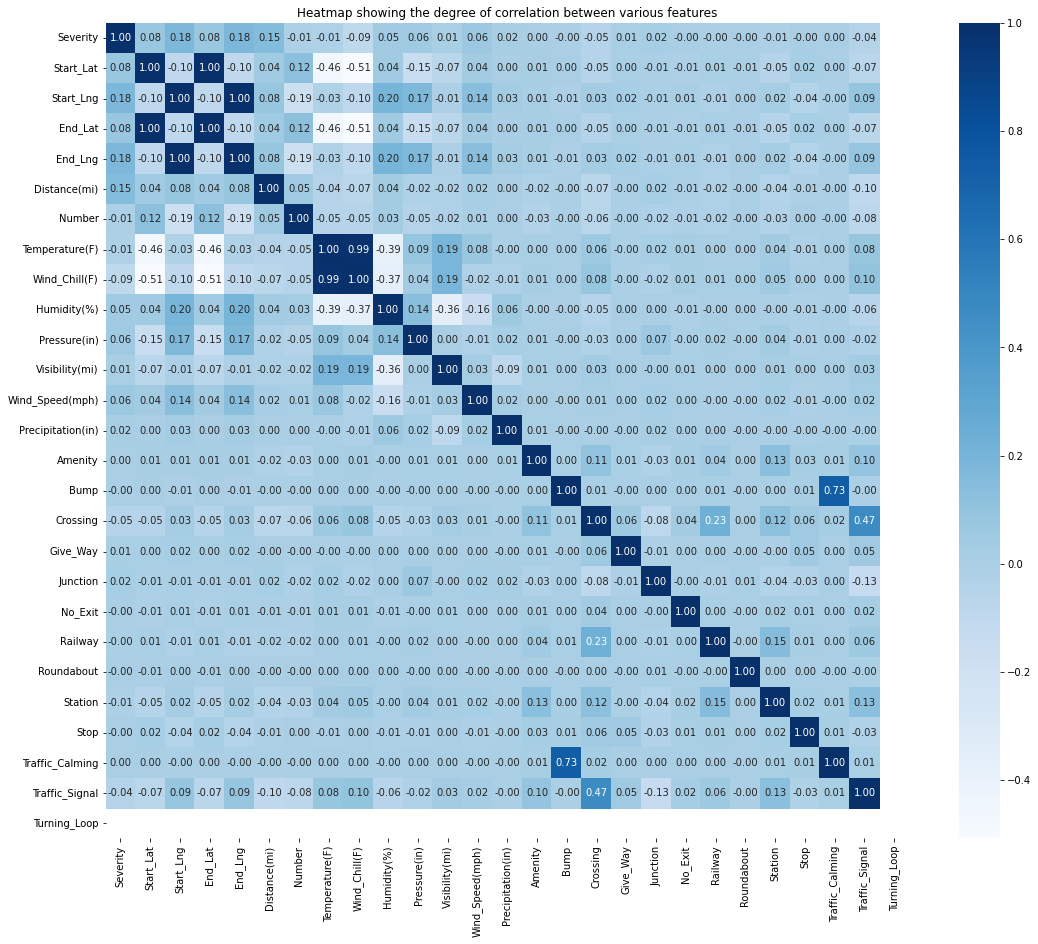

In [43]:
# heatmap to see the correlation between various columns
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),
            annot = True,
            fmt='.2f',
            cmap = 'Blues')
plt.title('Heatmap showing the degree of correlation between various features')
plt.show()

**From the above heatmap we can see that**


*   Start Latitude is highly correlated to End Latitude
*   Start Longitude is highly correlated to End Longitude
*   Temperature is highly correlated to Wind Chill






In [44]:
# descriptive statistics for the data
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


## Data Cleaning

In [45]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [46]:
df['Severity'].value_counts()

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64

In [47]:
# percentage of missing values in each of the columns
missing_percnt = (100 * df.isnull().sum() / df.shape[0])

In [48]:
missing_percnt

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   69.000715
Street                    0.000000
Side                      0.000000
City                      0.005475
County                    0.000000
State                     0.000000
Zipcode                   0.061673
Country                   0.000000
Timezone                  0.151841
Airport_Code              0.280199
Weather_Timestamp         1.996222
Temperature(F)            2.838469
Wind_Chill(F)            29.637007
Humidity(%)               3.001786
Pressure(in)              2.392643
Visibility(mi)            2.916170
Wind_Direction            2.760965
Wind_Speed(mph)           8.499773
Precipitation(in)   

**We can drop Number, Precipitation and Wind Chill columns as they have high percentage of missing values**

In [49]:
# Number of rows for each Severity where there is a missing temperature value
df[(df['Temperature(F)'].isnull() == True)].groupby('Severity')['ID'].count()

Severity
1      344
2    36326
3     3303
4     3060
Name: ID, dtype: int64

In [50]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [51]:
df[df['Wind_Direction'].isnull() == True]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
162,A-2716762,3,2016-02-14 17:40:17,2016-02-14 23:40:17,40.036600,-85.725620,40.038330,-85.719480,0.346,At IN-67/IN-9/Exit 22 - Accident.,NaN,I-69 N,R,Anderson,Madison,IN,46013,US,US/Eastern,KAID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
164,A-2716764,3,2016-02-14 18:03:51,2016-02-15 00:03:51,40.049152,-85.682047,40.037440,-85.723430,2.334,At IN-67/IN-9/Exit 22 - Accident.,NaN,IN-9 S,R,Anderson,Madison,IN,46013,US,US/Eastern,KAID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
409,A-2717009,3,2016-02-23 16:00:41,2016-02-23 22:00:41,41.208579,-82.807829,41.208579,-82.807829,0.000,At Bellevue - Accident.,2198.0,Heyman Rd,R,Bellevue,Huron,OH,44811-9736,US,US/Eastern,KPCW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1128,A-2717728,2,2016-03-25 01:49:51,2016-03-25 07:49:51,37.942090,-122.475470,37.942064,-122.475324,0.008,At Richmond-San Rafael Brg - Accident.,NaN,Richmond-San Rafael Brg,R,Ross Valley,Marin,CA,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1424,A-2718024,2,2016-04-01 14:07:09,2016-04-01 20:07:09,37.933100,-122.414470,37.942140,-122.474760,3.344,At Richmond-San Rafael Brg - Accident.,NaN,Richmond-San Rafael Brg,R,West Contra Costa,Contra Costa,CA,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515826,A-4239169,2,2019-08-23 12:23:00,2019-08-23 13:45:00,40.705620,-111.546730,40.703698,-111.546393,0.134,At UT-248/Kearns Blvd - Accident.,5201.0,Highway 224,L,Park City,Summit,UT,84098-5954,US,US/Mountain,K36U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1515832,A-4239175,2,2019-08-23 13:23:00,2019-08-23 14:30:00,40.792697,-111.450383,40.787629,-111.454405,0.409,At Tollgate Canyon Rd/Exit 150 - Accident.,NaN,I-80 W,R,Coalville,Summit,UT,84017,US,US/Mountain,K36U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1515920,A-4239263,2,2019-08-23 17:19:55,2019-08-24 03:11:30,44.119763,-121.317222,44.119050,-121.316760,0.054,At Old Bend-Redmond Hwy - Accident.,63959.0,Highway 20,L,Bend,Deschutes,OR,97703-8588,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1515975,A-4239318,2,2019-08-23 23:48:20,2019-08-24 03:48:20,44.157060,-121.261170,44.130910,-121.279930,2.032,At NE Cooley Rd - Accident.,64921.0,N Highway 97,L,Bend,Deschutes,OR,97703,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


In [52]:
df.groupby('State')['Wind_Direction'].agg(pd.Series.mode)

State
AL    CALM
AR    CALM
AZ      SW
CA    CALM
CO      NW
CT      NW
DC      NW
DE      NW
FL      NE
GA    CALM
IA      NW
ID    CALM
IL      SW
IN      SW
KS       N
KY      SW
LA      NE
MA      SW
MD    CALM
ME      NW
MI      SW
MN      NW
MO      NW
MS    CALM
MT    CALM
NC    CALM
ND      NW
NE      NW
NH      NW
NJ      NW
NM      SW
NV    CALM
NY      NW
OH      SW
OK       S
OR    CALM
PA    CALM
RI      NW
SC    CALM
SD      NW
TN    CALM
TX      SE
UT      NW
VA    CALM
VT      NW
WA    CALM
WI      NW
WV    CALM
WY      SW
Name: Wind_Direction, dtype: object

In [53]:
df.loc[1516002]

ID                                                          A-4239345
Severity                                                            2
Start_Time                                        2019-08-23 10:02:30
End_Time                                          2019-08-23 10:31:24
Start_Lat                                                     37.8366
Start_Lng                                                    -122.012
End_Lat                                                       37.8384
End_Lng                                                      -122.015
Distance(mi)                                                    0.203
Description              At Stone Valley Rd - Accident. Lane blocked.
Number                                                            NaN
Street                                                        I-680 N
Side                                                                R
City                                                         Danville
County              

In [54]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [55]:
df.shape

(1516064, 47)

In [56]:
def clean_df(df1):
    """
    This function cleans the data in the df1 dataframe by
    1. Filling in null values 
    2. Create Hour and Min column
    """

    df = df1.copy()
    
    # drop the columns which have high number of missing values or which are not useful
    df = df.drop(columns=['Number', 'Wind_Chill(F)', 'Precipitation(in)', 'Weather_Timestamp'])
    
    # dropping country and turning loop as they have only a single unique value in the data
    df = df.drop(columns=['Country','Turning_Loop'])

    # dropping the id column as it is of no significance
    df = df.drop(columns=['ID'])

    # converting start time, end time and weather timestamp into datetime objects
    df['Start_Time'] = pd.to_datetime(df['Start_Time'])
    df['End_Time'] = pd.to_datetime(df['End_Time'])
    
    # getting the year, month, day, hour, min, sec and weekday from start time
    df['Start_Year'] = df['Start_Time'].dt.year
    df['Start_Month'] = df['Start_Time'].dt.month
    df['Start_Day'] = df['Start_Time'].dt.day
    df['Start_Hour'] = df['Start_Time'].dt.hour
    df['Start_Weekday' ]= df['Start_Time'].dt.weekday

    # filling null values in Wind Direction with 0.0
    df.loc[(df['Wind_Direction']=='CALM'), 'Wind_Speed(mph)'] = df.loc[(df['Wind_Direction'] == 'CALM'), 'Wind_Speed(mph)'].fillna(0.0)

    # filling null values 
    df['Temperature(F)'] = df.groupby(['State','Start_Month'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean()))
    df['Humidity(%)'] = df.groupby(['State','Start_Month'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean()))
    df['Pressure(in)'] = df.groupby(['State','Start_Month'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean()))
    df['Visibility(mi)'] = df.groupby(['State','Start_Month'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean()))
    df['Wind_Speed(mph)'] = df.groupby(['State','Start_Month'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean()))
    df['Temperature(F)'] = df.groupby(['State','Start_Month'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean()))
    df['Wind_Direction'] = df.groupby(['State','Start_Month'], sort=False)['Wind_Direction'].apply(lambda x: x.fillna(x.mode().iloc[0]))
    df['Weather_Condition'] = df.groupby(['State','Start_Month'], sort=False)['Weather_Condition'].apply(lambda x: x.fillna(x.mode().iloc[0]))
    df['Sunrise_Sunset'] = df.groupby(['State','Start_Month'], sort=False)['Sunrise_Sunset'].apply(lambda x: x.fillna(x.mode().iloc[0]))
    df['Civil_Twilight'] = df.groupby(['State','Start_Month'], sort=False)['Civil_Twilight'].apply(lambda x: x.fillna(x.mode().iloc[0]))
    df['Nautical_Twilight'] = df.groupby(['State','Start_Month'], sort=False)['Nautical_Twilight'].apply(lambda x: x.fillna(x.mode().iloc[0]))
    df['Astronomical_Twilight'] = df.groupby(['State','Start_Month'], sort=False)['Astronomical_Twilight'].apply(lambda x: x.fillna(x.mode().iloc[0]))

    # drop rows with null values
    df = df.dropna()

    # dropping the duplicated rows
    df = df.drop_duplicates()

    return df

In [57]:
# applying the clean function on the data
df = clean_df(df)

In [58]:
df.shape

(1388431, 45)

In [59]:
df['Severity'].value_counts()

2    1093828
3     157439
4     110795
1      26369
Name: Severity, dtype: int64

In [60]:
df.isnull().sum()

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
C

## Train-test split for sample of full data

In [61]:
# shuffle the dataset before taking a sample of this for train and test
#df2 = df1.sample(frac = 1, random_state= 71)
df2 = df.copy()

In [62]:
df2['State'].unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [63]:
df2.shape

(1388431, 45)

In [64]:
# shuffle the dataset before taking a sample of this for train and test
df2 = df2.sample(frac = 1, random_state = 1)
acc_df = df2.iloc[:200000,:].copy()

In [65]:
acc_df['Severity'].value_counts()

2    157611
3     22617
4     16044
1      3728
Name: Severity, dtype: int64

In [66]:
# the top 5 rows of the sample dataset with 300000 rows
acc_df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday
385029,2,2020-10-18 09:58:44,2020-10-18 12:38:08,42.739530,-78.849617,42.710500,-78.908827,3.613,Crash on I-90 - NYS Thruway eastbound at After...,I-90 W,R,Hamburg,Erie,NY,14075,US/Eastern,KBUF,55.000000,40.00000,29.440000,10.000000,S,12.000000,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2020,10,18,9,6
1153885,2,2019-09-10 06:31:00,2019-09-10 08:24:13,34.227714,-118.185899,34.227714,-118.185899,0.000,At Angeles Crest Hwy - Accident.,Angeles Crest Hwy,R,La Canada Flintridge,Los Angeles,CA,91011-1874,US/Pacific,KMWS,74.739955,53.58469,29.535339,9.360973,CALM,6.489302,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2019,9,10,6,1
187265,2,2017-04-17 17:47:44,2017-04-17 23:47:44,30.288700,-81.627500,30.293130,-81.632280,0.418,At US-1-ALT/SR-126/Exit 347 - Accident.,Abby Ln,R,Jacksonville,Duval,FL,32207-5718,US/Eastern,KNIP,81.000000,44.00000,30.060000,10.000000,SE,16.100000,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2017,4,17,17,0
427022,2,2020-12-31 04:32:47,2020-12-31 10:32:00,44.847511,-123.008733,44.852311,-123.009583,0.334,A disabled vehicle is creating a hazard. Use c...,I-5 N,R,Salem,Marion,OR,97317,US/Pacific,KSLE,47.000000,90.00000,29.850000,8.000000,S,10.000000,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020,12,31,4,3
842816,4,2020-06-20 14:59:38,2020-06-20 17:04:36,41.082050,-95.928030,41.076680,-95.891230,1.952,Closed between US-75 and Harlan Lewis Rd - Roa...,Highway 75 S,R,Bellevue,Sarpy,NE,68123,US/Central,KOFF,80.000000,59.00000,28.800000,10.000000,SW,8.000000,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2020,6,20,14,5


In [67]:
# check the shape of the dataset
acc_df.shape

(200000, 45)

In [68]:
# check the variance in the data
acc_df.var().sort_values(ascending=False)

Humidity(%)        532.421725
Start_Lng          341.957254
End_Lng            341.952465
Temperature(F)     334.663282
Start_Day           75.719946
Start_Hour          36.465804
Wind_Speed(mph)     33.227753
Start_Lat           26.449118
End_Lat             26.449063
Start_Month         13.315173
Visibility(mi)       8.246419
Start_Weekday        3.328420
Distance(mi)         2.532818
Start_Year           1.893644
Pressure(in)         1.024046
Severity             0.387641
Junction             0.119308
Traffic_Signal       0.096822
Crossing             0.052624
Station              0.017594
Stop                 0.011075
Railway              0.008546
Amenity              0.007690
Give_Way             0.002001
No_Exit              0.001184
Traffic_Calming      0.000300
Bump                 0.000140
Roundabout           0.000035
dtype: float64

In [69]:
# get the descriptive statistics for the data
acc_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.254885,36.986225,-98.986697,36.986254,-98.986577,0.580367,59.898456,64.366604,29.556929,9.131505,7.260972,2018.842265,7.529215,16.156820,12.584430,2.608890
std,0.622608,5.142871,18.492086,5.142865,18.491957,1.591483,18.293804,23.074265,1.011952,2.871658,5.764352,1.376097,3.648996,8.701721,6.038692,1.824396
min,1.000000,24.571310,-124.497567,24.571309,-124.497478,0.000000,-27.400000,1.000000,19.370000,0.000000,0.000000,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,33.873023,-118.231238,33.873250,-118.231071,0.000000,48.000000,48.000000,29.460000,10.000000,3.500000,2018.000000,4.000000,9.000000,8.000000,1.000000
50%,2.000000,37.404070,-94.852750,37.403564,-94.847688,0.175000,61.000000,67.000000,29.880000,10.000000,6.900000,2019.000000,8.000000,16.000000,14.000000,3.000000
75%,2.000000,40.747791,-81.137848,40.748340,-81.138155,0.586000,73.889455,83.000000,30.040000,10.000000,10.000000,2020.000000,11.000000,24.000000,17.000000,4.000000
max,4.000000,48.991144,-67.849851,48.993995,-67.849851,149.687000,168.800000,100.000000,30.960000,120.000000,822.800000,2020.000000,12.000000,31.000000,23.000000,6.000000


In [70]:
# create X and y where X contains all the features and y is the target variable
feature_cols = list(acc_df.columns)
feature_cols.remove('Severity')
X = acc_df[feature_cols]
y = acc_df['Severity']

In [71]:
# split the X, y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124, stratify = y)

In [72]:
X_train.columns

Index(['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat',
       'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Start_Year', 'Start_Month', 'Start_Day',
       'Start_Hour', 'Start_Weekday'],
      dtype='object')

In [73]:
X_test.columns

Index(['Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat',
       'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Start_Year', 'Start_Month', 'Start_Day',
       'Start_Hour', 'Start_Weekday'],
      dtype='object')

In [74]:
acc_df['City'].nunique()

7547

In [75]:
acc_df['County'].nunique()

1405

## Feature engineering function

In [76]:
def feature_eng(df1):
    """
    This function does feature engineering on the X_train and X_test dataframes.
    """
    df = df1.copy()

    # get the time duration in minutes from start and end time
    df['Time_Duration(min)'] = df['End_Time'] - df['Start_Time']
    df['Time_Duration(min)'] = df['Time_Duration(min)'].apply(lambda x: (x.seconds)/60)

    # drop the end time column as it is not useful now
    df = df.drop(columns=['End_Time'])

    # dropping the start time column as we have converted it into individual time values
    df = df.drop(columns=['Start_Time'])
    
    # drop all the columns which will not be used in the model
    df = df.drop(columns = ['Description', 'Street', 'County', 'State', 'End_Lat', 'End_Lng'])
    df = df.drop(columns = ['Zipcode', 'Airport_Code', 'Weather_Condition'])
    df = df.drop(columns = ['Sunrise_Sunset', 'City', 'Nautical_Twilight','Timezone',  'Astronomical_Twilight'])
    
    # convert remaining object columns to categorical columns
    df = df.astype({'Side':'category'})
       
    # Convert columns with boolean values to int
    df = df.astype({'Amenity':'int', 'Bump':'int', 'Crossing':'int', 'Give_Way':'int', 'Junction':'int', 
                    'No_Exit':'int', 'Railway':'int', 'Roundabout':'int', 'Station':'int', 'Stop':'int', 
                    'Traffic_Calming':'int', 'Traffic_Signal':'int'})
    
    # one-hot encoding all the categorical columns
    df = pd.get_dummies(df, columns = ['Side', 'Civil_Twilight', 'Wind_Direction'], drop_first=True, prefix=['Side', 'Civil_Twilight', 'Wind'])
    
    return df

## Feature Engineering train and test data

In [77]:
# feature engineering the X_train data
X_train = feature_eng(X_train)

# feature engineering the X_test data
X_test = feature_eng(X_test)

In [78]:
X_train.head()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday,Time_Duration(min),Side_R,Civil_Twilight_Night,Wind_E,Wind_N,Wind_NE,Wind_NW,Wind_S,Wind_SE,Wind_SW,Wind_VAR,Wind_W
65817,26.225250,-80.136270,0.754,79.0,84.0,29.96,4.0,5.8,0,0,0,0,0,0,0,0,0,0,0,0,2016,9,27,12,1,360.000000,1,0,0,0,0,0,1,0,0,0,0
1022895,38.160668,-122.571795,0.000,54.0,100.0,30.35,10.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,4,11,5,34.483333,1,0,0,0,0,0,0,0,0,1,0
731948,39.780120,-104.953080,0.000,75.0,38.0,24.54,20.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,2020,5,30,11,5,60.000000,1,0,0,0,0,1,0,0,0,0,0
871497,39.938220,-75.031540,0.195,41.0,89.0,29.93,10.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,2020,3,23,20,0,15.000000,0,1,0,0,0,1,0,0,0,0,0
690442,25.637106,-80.479579,0.049,80.0,96.0,29.91,10.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2020,9,25,5,4,215.483333,0,1,0,0,0,0,0,0,0,0,0


In [79]:
# Selecting all the numeric columns
colnames_numeric = X_train.select_dtypes(include=np.number).columns.tolist()
colnames_numeric

['Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Start_Year',
 'Start_Month',
 'Start_Day',
 'Start_Hour',
 'Start_Weekday',
 'Time_Duration(min)',
 'Side_R',
 'Civil_Twilight_Night',
 'Wind_E',
 'Wind_N',
 'Wind_NE',
 'Wind_NW',
 'Wind_S',
 'Wind_SE',
 'Wind_SW',
 'Wind_VAR',
 'Wind_W']

In [80]:
# Scaling the data
features = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
            'Time_Duration(min)', 'Start_Year', 'Start_Month', 'Start_Day', 'Start_Hour', 'Start_Weekday']
scaler = MinMaxScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

In [81]:
X_train.head()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday,Time_Duration(min),Side_R,Civil_Twilight_Night,Wind_E,Wind_N,Wind_NE,Wind_NW,Wind_S,Wind_SE,Wind_SW,Wind_VAR,Wind_W
65817,0.067731,0.783109,0.009167,0.679438,0.838384,0.914508,0.033333,0.007049,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.727273,0.866667,0.521739,0.166667,0.250006,1,0,0,0,0,0,1,0,0,0,0
1022895,0.556502,0.033996,0.000000,0.519796,1.000000,0.948187,0.083333,0.003646,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.000000,0.100000,0.478261,0.833333,0.023947,1,0,0,0,0,0,0,0,0,1,0
731948,0.622821,0.345018,0.000000,0.653895,0.373737,0.446459,0.166667,0.009723,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.363636,0.966667,0.478261,0.833333,0.041668,1,0,0,0,0,1,0,0,0,0,0
871497,0.629295,0.873222,0.002371,0.436782,0.888889,0.911917,0.083333,0.010938,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.181818,0.733333,0.869565,0.000000,0.010417,0,1,0,0,0,1,0,0,0,0,0
690442,0.043646,0.777048,0.000596,0.685824,0.959596,0.910190,0.083333,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.727273,0.800000,0.217391,0.666667,0.149645,0,1,0,0,0,0,0,0,0,0,0


In [82]:
X_test.head()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday,Time_Duration(min),Side_R,Civil_Twilight_Night,Wind_E,Wind_N,Wind_NE,Wind_NW,Wind_S,Wind_SE,Wind_SW,Wind_VAR,Wind_W
477381,0.048182,0.779306,0.000511,0.538953,0.525253,0.930052,0.083333,0.007292,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.000000,0.233333,0.956522,0.166667,0.331142,0,1,0,0,0,1,0,0,0,0,0
1341394,0.682294,0.905131,0.027721,0.392082,0.919192,0.883420,0.008333,0.022363,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.181818,0.200000,0.565217,0.333333,0.250006,1,0,0,0,1,0,0,0,0,0,0
1302389,0.716175,0.643461,0.006395,0.646871,0.818182,0.899827,0.083333,0.013977,0,0,0,0,1,0,0,0,0,0,0,0,0.5,0.545455,0.666667,0.565217,0.833333,0.020521,1,0,0,0,1,0,0,0,0,0,0
910553,0.353930,0.125476,0.000000,0.526181,0.797980,0.909326,0.033333,0.010938,0,0,0,0,1,0,0,0,0,0,0,0,1.0,0.272727,0.300000,0.391304,0.666667,0.036668,1,0,0,0,1,0,0,0,0,0,0
848141,0.382099,0.109647,0.000000,0.545338,0.595960,0.916235,0.083333,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.181818,0.233333,0.434783,1.000000,0.063543,1,0,0,0,0,0,0,0,0,0,0


## Logistic Regression

In [83]:
# Logistic Regression with class_weight parameter set to balanced
logmodel = LogisticRegression(multi_class='ovr', solver='liblinear', class_weight='balanced')
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
logmodel.score(X_train, y_train)

0.70033125

In [85]:
# get the metrics for the train data
y_train_pred_lr = logmodel.predict(X_train)
print(accuracy_score(y_train, y_train_pred_lr))
print(precision_score(y_train, y_train_pred_lr, average = 'weighted', zero_division=0))
print(recall_score(y_train, y_train_pred_lr, average = 'weighted', zero_division=0))
print(f1_score(y_train, y_train_pred_lr, average = 'weighted'))

0.70033125
0.7438531001683061
0.70033125
0.7180961155969874


In [86]:
# get the metrics for test data
y_test_pred_lr = logmodel.predict(X_test)
print(accuracy_score(y_test, y_test_pred_lr))
print(precision_score(y_test, y_test_pred_lr, average = 'weighted', zero_division=0))
print(recall_score(y_test, y_test_pred_lr, average = 'weighted', zero_division=0))
print(f1_score(y_test, y_test_pred_lr, average = 'weighted'))

0.69665
0.7412962111502794
0.69665
0.7151139141039109


In [87]:
# get the precision score for train and test sets for individual classes
print(precision_score(y_train, y_train_pred_lr, average = None, zero_division=0))
print(precision_score(y_test, y_test_pred_lr, average = None, zero_division=0))

[0.15579596 0.86931135 0.24363328 0.35317592]
[0.14867876 0.86812771 0.22348485 0.36303847]


## Decision Trees

In [132]:
# create Decision tree classifier model and fit X and y train on the model
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1) # class_weight balanced lowers the scores, so not using it
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [133]:
# check the different classes in the model
treeclf.classes_

array([1, 2, 3, 4])

In [134]:
# check the scores of the decision tree
print(f'Score on training set: {treeclf.score(X_train, y_train)}')
print(f'Score on testing set: {treeclf.score(X_test, y_test)}')

Score on training set: 0.79035625
Score on testing set: 0.790475


In [135]:
# get the metrics for the train data
y_train_pred_dt = treeclf.predict(X_train)
print(accuracy_score(y_train, y_train_pred_dt))
print(precision_score(y_train, y_train_pred_dt, average = 'weighted', zero_division=0))
print(recall_score(y_train, y_train_pred_dt, average = 'weighted', zero_division=0))
print(f1_score(y_train, y_train_pred_dt, average = 'weighted'))

0.79035625
0.6661981658839679
0.79035625
0.7073609194680835


In [136]:
# get the metrics for test data
y_test_pred_dt = treeclf.predict(X_test)
print(accuracy_score(y_test, y_test_pred_dt))
print(precision_score(y_test, y_test_pred_dt, average = 'weighted', zero_division=0))
print(recall_score(y_test, y_test_pred_dt, average = 'weighted', zero_division=0))
print(f1_score(y_test, y_test_pred_dt, average = 'weighted'))

0.790475
0.6668308675308735
0.790475
0.7077724735723709


In [137]:
# get the precision score for train and test sets for individual classes
print(precision_score(y_train, y_train_pred_dt, average = None, zero_division=0))
print(precision_score(y_test, y_test_pred_dt, average = None, zero_division=0))

[0.         0.79420725 0.         0.50260293]
[0.         0.79433828 0.         0.50922509]


## Hyperparameter tuning for Decision Trees

In [138]:
# using GridSearchCV for hyper parameter tuning on the decision tree classifier model
grid = GridSearchCV(estimator = DecisionTreeClassifier(), 
                    param_grid = {'max_depth': [3, 5, 7, 9, 11, 13], 
                                  'min_samples_split': [10, 15, 30, 45, 60], 
                                  'min_samples_leaf': [10, 15, 30, 45, 60]}, 
                    cv = 5, 
                    verbose = 1, 
                    scoring = 'balanced_accuracy', 
                    n_jobs = -1)


In [139]:
# time calculating how long it takes to complete running the code
now = time()
grid.fit(X_train, y_train)
print(f' Time in seconds: {time() - now}')

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 12.0min finished


 Time in seconds: 721.0951681137085


In [140]:
# check the best params that will give best model
grid.best_params_

{'max_depth': 13, 'min_samples_leaf': 15, 'min_samples_split': 60}

In [141]:
# score from grid search parameters
grid.best_score_

0.5703710212666071

In [142]:
# estimator from grid search parameters
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [143]:
# creating set up for the decision tree
dt = DecisionTreeClassifier(max_depth = 13,
                            min_samples_split = 45,
                            min_samples_leaf = 10
                           )

In [144]:
# fitting then train data to the decision tree set up
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=13, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=45,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [145]:
# evaluate the model on the training set and testing set
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.85098125
Score on testing set: 0.828925


In [146]:
# get the metrics for the train data
y_train_pred_dt = dt.predict(X_train)
print(accuracy_score(y_train, y_train_pred_dt))
print(precision_score(y_train, y_train_pred_dt, average = 'weighted', zero_division=0))
print(recall_score(y_train, y_train_pred_dt, average = 'weighted', zero_division=0))
print(f1_score(y_train, y_train_pred_dt, average = 'weighted'))

0.85098125
0.8341023261307627
0.85098125
0.8337533247662688


In [147]:
# get the metrics for test data
y_test_pred_dt = dt.predict(X_test)
print(accuracy_score(y_test, y_test_pred_dt))
print(precision_score(y_test, y_test_pred_dt, average = 'weighted', zero_division=0))
print(recall_score(y_test, y_test_pred_dt, average = 'weighted', zero_division=0))
print(f1_score(y_test, y_test_pred_dt, average = 'weighted'))

0.828925
0.8056474293348509
0.828925
0.8102121797339185


In [148]:
# get the precision score for train and test sets for individual classes
print(precision_score(y_train, y_train_pred_dt, average = None, zero_division=0))
print(precision_score(y_test, y_test_pred_dt, average = None, zero_division=0))

[0.72662842 0.87899779 0.67918017 0.63642604]
[0.65584416 0.87039397 0.57261067 0.5329263 ]


## Feature Importance

In [149]:
# get the feature columns in X train 
eng_feature_cols = list(X_train.columns)

In [150]:
# create a list with all the features in the feature-engineered X train and their importance using the attribute feature_importances_
importance = list(zip(eng_feature_cols, list(dt.feature_importances_)))

In [151]:
# list the feature importances
importance

[('Start_Lat', 0.1230814280241623),
 ('Start_Lng', 0.22064018001263266),
 ('Distance(mi)', 0.09381855730047511),
 ('Temperature(F)', 0.006237620667143149),
 ('Humidity(%)', 0.005446226368456172),
 ('Pressure(in)', 0.013647080946823344),
 ('Visibility(mi)', 0.00044314516128904287),
 ('Wind_Speed(mph)', 0.0027319910050322424),
 ('Amenity', 0.0),
 ('Bump', 0.0),
 ('Crossing', 0.0007462034461728203),
 ('Give_Way', 0.0),
 ('Junction', 0.001127770396405326),
 ('No_Exit', 0.0),
 ('Railway', 0.0),
 ('Roundabout', 0.0),
 ('Station', 2.544296992373127e-05),
 ('Stop', 7.782268378999995e-05),
 ('Traffic_Calming', 0.0),
 ('Traffic_Signal', 0.007894690003272841),
 ('Start_Year', 0.1423551624289499),
 ('Start_Month', 0.037414583735008035),
 ('Start_Day', 0.005370208066895467),
 ('Start_Hour', 0.047799724607363245),
 ('Start_Weekday', 0.03451154332318248),
 ('Time_Duration(min)', 0.20608034445399936),
 ('Side_R', 0.03316433544626588),
 ('Civil_Twilight_Night', 0.014216150530608936),
 ('Wind_E', 7.8645

## Random Forests

In [152]:
# grid search cv on Random Forests
grid_rf = GridSearchCV(estimator = RandomForestClassifier(), 
                    param_grid = {'max_depth': [5, 7, 9, 11, 13], 
                                  'min_samples_split': [15, 30, 45, 60], 
                                  'min_samples_leaf': [15, 30, 45, 60],
                                  'bootstrap': [False, True]}, 
                    cv = 5, 
                    verbose = 1, 
                    scoring = 'balanced_accuracy', 
                    n_jobs = -1)

In [156]:
# time calculating how long it takes to complete running the code
now = time()
grid_rf.fit(X_train[:20000], y_train[:20000])
print(f' Time in seconds: {time() - now}')

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 20.7min finished


 Time in seconds: 1244.4032649993896


In [155]:
# check the best params that will give best model
grid_rf.best_params_

{'bootstrap': False,
 'max_depth': 13,
 'min_samples_leaf': 15,
 'min_samples_split': 15}

In [166]:
rf = RandomForestClassifier(#n_estimators=100, 
                            min_samples_split=15, 
                            min_samples_leaf=15, 
                            max_depth= 13, 
                            n_jobs=-1, 
                            #random_state=1,
                            bootstrap = False)

In [167]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [168]:
# get the metrics for the train data
y_train_pred_rf = rf.predict(X_train)
print(accuracy_score(y_train, y_train_pred_rf))
print(precision_score(y_train, y_train_pred_rf, average = 'weighted', zero_division=0))
print(recall_score(y_train, y_train_pred_rf, average = 'weighted', zero_division=0))
print(f1_score(y_train, y_train_pred_rf, average = 'weighted'))

0.83794375
0.8370787793048392
0.83794375
0.7993951368036625


In [169]:
# get the metrics for test data
y_test_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_test_pred_rf))
print(precision_score(y_test, y_test_pred_rf, average = 'weighted', zero_division=0))
print(recall_score(y_test, y_test_pred_rf, average = 'weighted', zero_division=0))
print(f1_score(y_test, y_test_pred_rf, average = 'weighted'))

0.82555
0.8097531279967618
0.82555
0.7813638145540285


In [170]:
# get the precision score for train and test sets for individual classes
print(precision_score(y_train, y_train_pred_rf, average = None, zero_division=0))
print(precision_score(y_test, y_test_pred_rf, average = None, zero_division=0))

[0.8289801  0.83840215 0.8364726  0.82681433]
[0.81839623 0.83148133 0.7334576  0.70184426]


## Decision Trees with Bagging Classifier

In [171]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth = 13, min_samples_split = 45, min_samples_leaf = 10),
                            )

In [172]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=13,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=10,
                                                        min_samples_split=45,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [174]:
# get the metrics for the train data
y_train_pred_bagclfdt = bag_clf.predict(X_train)
print(accuracy_score(y_train, y_train_pred_bagclfdt))
print(precision_score(y_train, y_train_pred_bagclfdt, average = 'weighted', zero_division=0))
print(recall_score(y_train, y_train_pred_bagclfdt, average = 'weighted', zero_division=0))
print(f1_score(y_train, y_train_pred_bagclfdt, average = 'weighted'))

0.85640625
0.8418150145022506
0.85640625
0.8377312572453548


In [175]:
# get the metrics for test data
y_test_pred_bagclfdt = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_test_pred_bagclfdt))
print(precision_score(y_test, y_test_pred_bagclfdt, average = 'weighted', zero_division=0))
print(recall_score(y_test, y_test_pred_bagclfdt, average = 'weighted', zero_division=0))
print(f1_score(y_test, y_test_pred_bagclfdt, average = 'weighted'))

0.8401
0.8185915322032574
0.8401
0.8192508791968669


In [176]:
# get the precision score for train and test sets for individual classes
print(precision_score(y_train, y_train_pred_bagclfdt, average = None, zero_division=0))
print(precision_score(y_test, y_test_pred_bagclfdt, average = None, zero_division=0))

[0.74059477 0.87655412 0.72244052 0.69234727]
[0.69832402 0.86958011 0.63410379 0.60572012]
